In [1]:
import os
from six.moves import urllib


In [4]:
import pandas as pd

def load_housing_data():
    return pd.read_csv('housing.csv')


In [5]:
#Let’s take a look at the top five rows using the DataFrame’s head() method
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
# You can find out what cate‐
#gories exist and how many districts belong to each category by using the
#value_counts() method:

housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
#Let’s look at the other fields. The describe() method shows a summary of the
#numerical attributes

housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

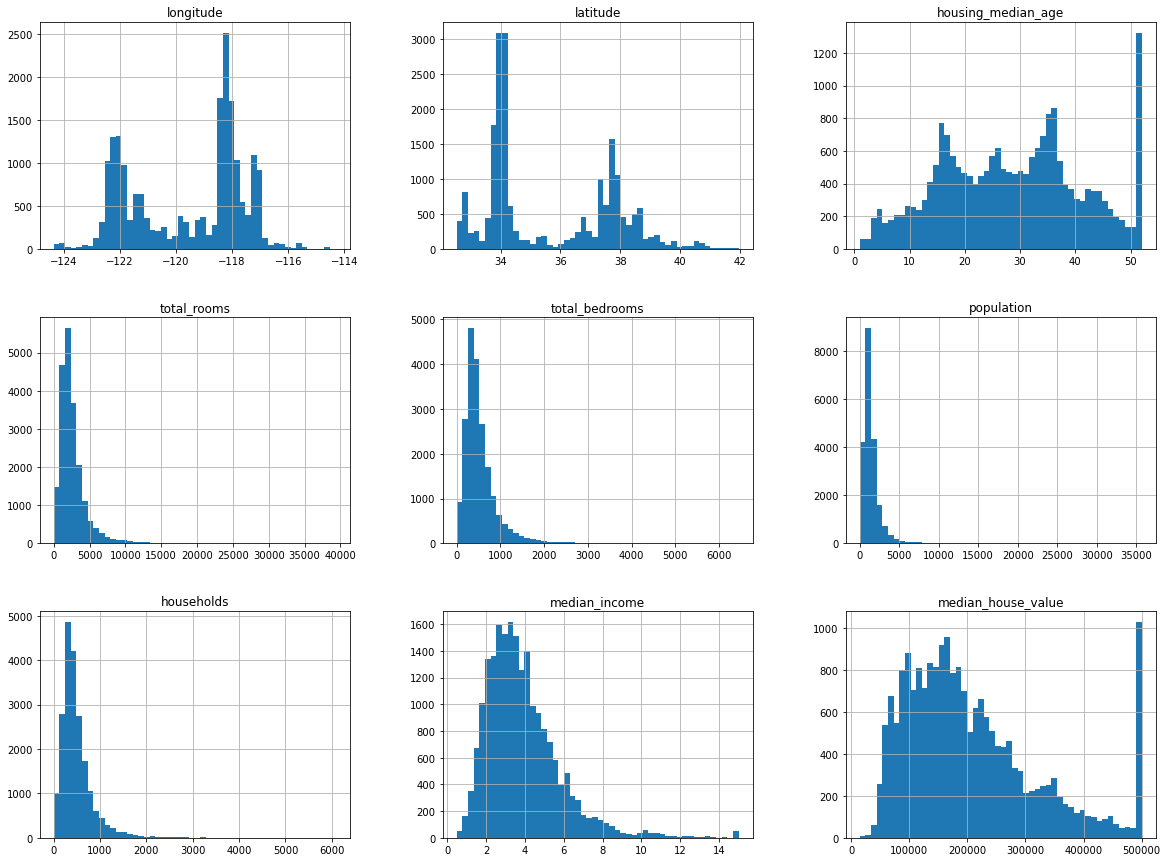

In [9]:
import matplotlib as plt
housing.hist(bins=50,figsize=(20,15))       

In [16]:
#Creating a Test set

import numpy as np

def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2)
    

In [17]:
len(test_set)


4128

In [18]:
len(train_set)


16512

<AxesSubplot:>

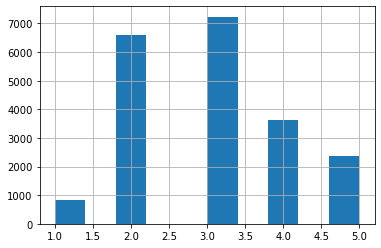

In [20]:
#The following code uses the
#pd.cut() function to create an income category attribute with 5 categories (labeled
#from 1 to 5): category 1 ranges from 0 to 1.5 (i.e., less than $15,000), category 2 from
#1.5 to 3, and so on:

housing["income_cat"] = pd.cut(housing["median_income"],
                            bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                            labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()


In [71]:
#Now you are ready to do stratified sampling based on the income category. For this
#you can use Scikit-Learn’s StratifiedShuffleSplit class:

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


In [72]:
#Let’s see if this worked as expected. You can start by looking at the income category
#proportions in the test set:

strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [73]:
#Now you should remove the income_cat attribute so the data is back to its original
#state:

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat",axis=1, inplace=True)

In [74]:
# Making a copy of train_set so that we can manipulate and play with
housing= strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

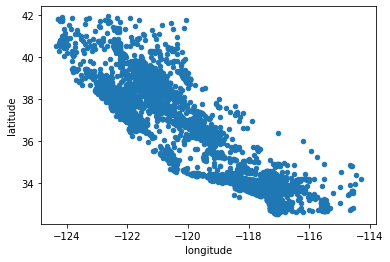

In [75]:
#Visualizing Geographical Data

#Since there is geographical information (latitude and longitude), it is a good idea to
#create a scatterplot of all districts to visualize the data

housing.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

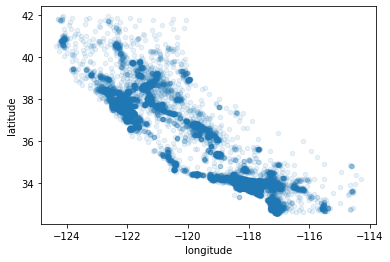

In [22]:
#Setting the alpha option to 0.1 makes it much easier to visualize the places
#where there is a high density of data points 

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)


In [79]:
#Looking for Correlations

#Now let’s look at how much each attribute correlates with the median house value:
#The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that
#there is a strong positive correlation; for example, the median house value tends to go
#up when the median income goes up. When the coefficient is close to –1, it means
#that there is a strong negative correlation; you can see a small negative correlation
#between the latitude and the median house value (i.e., prices have a slight tendency to
#go down when you go north).
#Finally, coefficients close to zero mean that there is no linear correlation

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

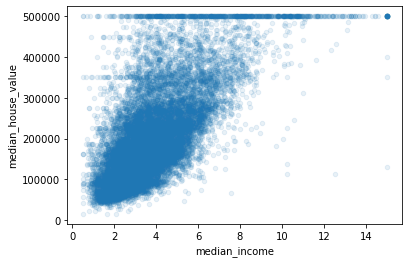

In [80]:
#Median income versus median house value
housing.plot(kind="scatter", x="median_income", y="median_house_value",
 alpha=0.1)

In [83]:
  #Experimenting with Attribute Combinations
#the total number of rooms in a district is not very useful if you don’t know how many
#households there are. What you really want is the number of rooms per household.
#Similarly, the total number of bedrooms by itself is not very useful: you probably
#want to compare it to the number of rooms


housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

# According to the correlation below The new bedrooms_per_room attribute is much more correlated with
#the median house value than the total number of rooms or bedrooms. Apparently
#houses with a lower bedroom/room ratio tend to be more expensive. and obviously the larger the houses,
#the more expensive they are.


median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64